# FEDERAL ELECTION COMMISSION

## 1. 

## 2. ĐỌC & LÀM SẠCH DỮ LIỆU

In [51]:
# 2.1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.2. Đọc dữ liệu FEC gốc
fec = pd.read_csv("datasets/P00000001-ALL.csv", low_memory=False)
# 2.3. Khám phá sơ bộ
# Xem cấu trúc
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [4]:
# 2.4. Kiểm tra giá trị thiếu
fec.isna().sum().sort_values(ascending=False).head(16)


receipt_desc         987565
memo_cd              909249
memo_text            903961
contbr_employer       13729
contbr_occupation      8430
contbr_zip              111
contbr_city              19
contbr_st                 4
cmte_id                   0
cand_id                   0
cand_nm                   0
contbr_nm                 0
contb_receipt_dt          0
contb_receipt_amt         0
form_tp                   0
file_num                  0
dtype: int64

In [5]:
# 2.5. Giữ lại các cột cần thiết
# Ta chỉ cần 10 cột chính liên quan đến phân tích tài chính – xã hội
fec = fec[[
    "cand_nm", "contbr_nm", "contbr_city", "contbr_st", "contbr_zip",
    "contbr_employer", "contbr_occupation",
    "contb_receipt_amt", "contb_receipt_dt"
]]
# 2.6. Loại bỏ các khoản hoàn tiền (số âm)
fec = fec[fec["contb_receipt_amt"] > 0]
# Kiểm tra
(fec["contb_receipt_amt"] > 0).value_counts()



contb_receipt_amt
True    991475
Name: count, dtype: int64

File dataset có 1001731 dòng, sau khi làm sạch còn 991475 dòng

In [6]:
# 2.7. Chuẩn hóa kiểu dữ liệu ngày tháng
fec["contb_receipt_dt"] = pd.to_datetime(fec["contb_receipt_dt"], errors="coerce")
# errors="coerce": nếu giá trị ngày sai định dạng → chuyển thành NaT (null date).

C:\Users\PC\AppData\Local\Temp\ipykernel_5320\2487789714.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fec["contb_receipt_dt"] = pd.to_datetime(fec["contb_receipt_dt"], errors="coerce")


In [8]:
# 2.8. Thêm cột đảng phái (party)
# Dữ liệu FEC không có đảng, ta ánh xạ thủ công
parties = {
    "Bachmann, Michelle": "Republican",
    "Cain, Herman": "Republican",
    "Gingrich, Newt": "Republican",
    "Huntsman, Jon": "Republican",
    "Johnson, Gary Earl": "Republican",
    "McCotter, Thaddeus G": "Republican",
    "Obama, Barack": "Democrat",
    "Paul, Ron": "Republican",
    "Pawlenty, Timothy": "Republican",
    "Perry, Rick": "Republican",
    "Roemer, Charles E. 'Buddy' III": "Republican",
    "Romney, Mitt": "Republican",
    "Santorum, Rick": "Republican"
}
fec["party"] = fec["cand_nm"].map(parties)
# 2.9. Kiểm tra số lượng từng đảng
fec["party"].value_counts()

party
Democrat      589127
Republican    402348
Name: count, dtype: int64

+ Democrat: Đảng dân chủ
+ Republican: Đảng cộng hòa
+ Đảng dân chủ(Obama) chiếm hơn 1 nửa số đóng góp (589k/1000k)

In [9]:
# 2.10. Tạo tập con gồm hai ứng cử viên chính
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo["cand_nm"].value_counts()

cand_nm
Obama, Barack    589127
Romney, Mitt     105155
Name: count, dtype: int64

Trong file csv có 107229 dòng cho Romney, Mitt

## 3. PHÂN TÍCH MÔ TẢ

In [12]:
# total_donation = fec_mrbo.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)
# print(total_donation)

# Tắt hiển thị số dạng e+08
pd.set_option('display.float_format', '{:,.0f}'.format)

# 3.1. Ai là ứng cử viên có tổng tiền quyên góp cao nhất?
total_donation = fec_mrbo.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)
print(total_donation)


cand_nm
Obama, Barack   135,877,427
Romney, Mitt     88,335,908
Name: contb_receipt_amt, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\2950205163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_donation.index, y=total_donation.values, palette=["#1f77b4", "#d62728"])


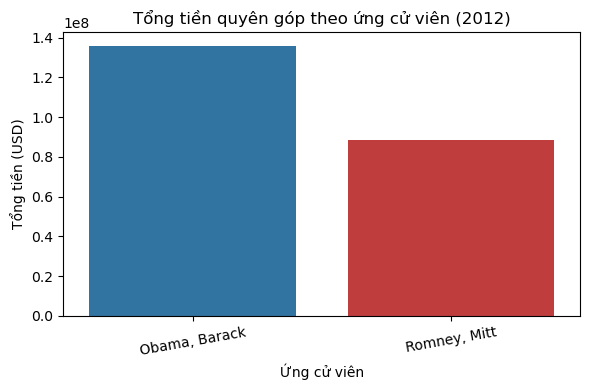

In [53]:
# Tổng quyên góp theo ứng cử viên
pd.set_option('display.float_format', '{:,.0f}'.format)
total_donation = fec_mrbo.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=total_donation.index, y=total_donation.values, palette=["#1f77b4", "#d62728"])
plt.title("Tổng tiền quyên góp theo ứng cử viên (2012)")
plt.ylabel("Tổng tiền (USD)")
plt.xlabel("Ứng cử viên")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

Obama, Barack có tổng tiền quyên góp cao nhất

In [ ]:
# 3.2. Trung bình mỗi người quyên góp bao nhiêu cho mỗi ứng cử viên?
avg_donation = fec_mrbo.groupby("cand_nm")["contb_receipt_amt"].mean().sort_values(ascending=False)
print(avg_donation)

cand_nm
Romney, Mitt    840
Obama, Barack   231
Name: contb_receipt_amt, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\3406787138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_donation.index, y=avg_donation.values, palette=["#d62728", "#1f77b4"])


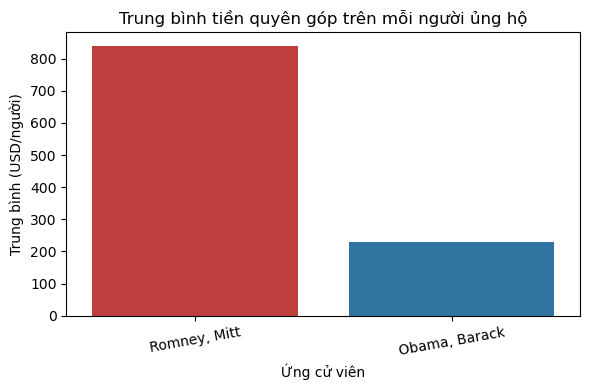

In [54]:
avg_donation = fec_mrbo.groupby("cand_nm")["contb_receipt_amt"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_donation.index, y=avg_donation.values, palette=["#d62728", "#1f77b4"])
plt.title("Trung bình tiền quyên góp trên mỗi người ủng hộ")
plt.ylabel("Trung bình (USD/người)")
plt.xlabel("Ứng cử viên")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


+ Romney có mức quyên góp trung bình cao hơn → ít người hơn nhưng quyên góp nhiều.
+ Trong khi Obama có mức trung bình thấp hơn → rộng hơn, phổ biến hơn (nhiều người, mỗi người đóng ít).

In [14]:
# 3.3. Ứng cử viên nào có nhiều người quyên góp hơn?
donor_counts = fec_mrbo.groupby("cand_nm")["contbr_nm"].nunique()
print(donor_counts)


cand_nm
Obama, Barack    185734
Romney, Mitt      66042
Name: contbr_nm, dtype: int64


+ Obama có lượng người ủng hộ đông hơn, điều này phù hợp với đặc trưng “grassroots campaign” – phong trào quần chúng quyên góp số tiền nhỏ.
+ (“grassroots campaign” là một chiến dịch vận động chính trị hoặc xã hội được khởi xướng và điều hành bởi những người dân bình thường, không phải bởi các lãnh đạo từ trên xuống)

In [15]:
# 3.4. Các bang quyên góp nhiều nhất
# Phân tích tổng quyên góp theo bang (contbr_st)
top_states = fec_mrbo.groupby("contbr_st")["contb_receipt_amt"].sum().sort_values(ascending=False).head(10)
print(top_states)


contbr_st
CA   35,062,621
NY   24,836,131
IL   20,072,467
FL   15,656,637
TX   12,792,822
MA   11,359,558
VA    7,725,743
NJ    6,536,578
MD    6,466,354
PA    5,654,946
Name: contb_receipt_amt, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\3861281938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


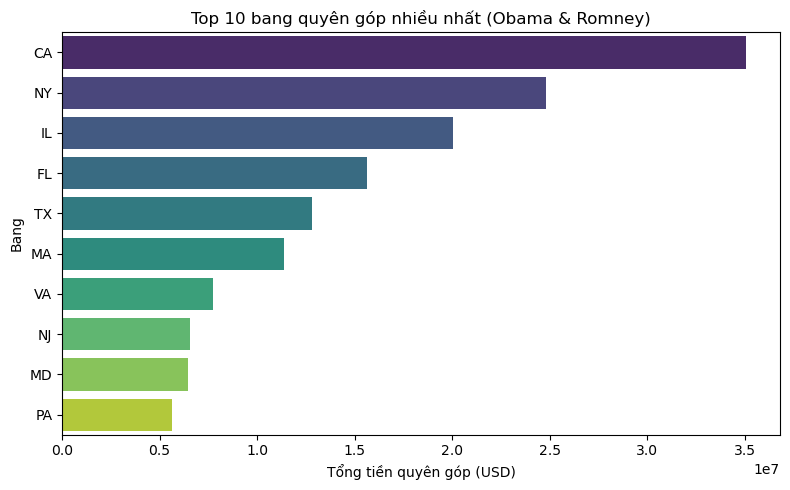

In [55]:
top_states = fec_mrbo.groupby("contbr_st")["contb_receipt_amt"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 bang quyên góp nhiều nhất (Obama & Romney)")
plt.xlabel("Tổng tiền quyên góp (USD)")
plt.ylabel("Bang")
plt.tight_layout()
plt.show()


Các bang đông dân và kinh tế mạnh như California, New York, Florida, Texas, Illinois là trung tâm tài trợ chính trị lớn nhất.

In [16]:
# 3.5. Phân tích tỷ lệ đóng góp theo ĐẢNG PHÁI
party_total = fec_mrbo.groupby("party")["contb_receipt_amt"].sum()
print(party_total)


party
Democrat     135,877,427
Republican    88,335,908
Name: contb_receipt_amt, dtype: float64


+ Đảng Dân chủ (Obama) dẫn đầu cả về tổng tiền lẫn số lượng người.

## 4. PHÂN TÍCH SO SÁNH

In [18]:
# 4.1. Chuẩn bị dữ liệu cần cho phân tích
# Trước khi phân tích, ta chỉ dùng tập fec_mrbo (Obama & Romney)
# Kiểm tra nhanh
fec_mrbo[["cand_nm", "party", "contb_receipt_amt", "contbr_occupation", "contbr_employer"]].head()
# Bảng bên dưới để kiểm tra các cột


,cand_nm,party,contb_receipt_amt,contbr_occupation,contbr_employer
411,"Romney, Mitt",Republican,25,FOREIGN SERVICE OFFICER,US GOVERNMENT
412,"Romney, Mitt",Republican,110,FOREIGN SERVICE OFFICER,US GOVERNMENT
413,"Romney, Mitt",Republican,250,INTELLIGENCE ANALYST,DEFENSE INTELLIGENCE AGENCY
414,"Romney, Mitt",Republican,30,ENGINEER,CISCO
415,"Romney, Mitt",Republican,100,COMPUTER SYSTEMS ENGINEER,RAYTHEON TECHNICAL SERVICES CORP


In [ ]:
# 4.2. Ai nhận được nhiều quyên góp nhỏ (< $200) hơn?
small_donations = fec_mrbo[fec_mrbo["contb_receipt_amt"] < 200]
small_sum = small_donations.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)
print(small_sum)


cand_nm
Obama, Barack   24,197,815
Romney, Mitt     2,460,298
Name: contb_receipt_amt, dtype: float64


+ Obama nhận được nhiều khoản quyên góp nhỏ hơn, thể hiện chiến dịch huy động đại chúng mạnh mẽ (grassroots campaign).
+ Romney dựa nhiều hơn vào quyên góp lớn từ nhà tài trợ giàu có hoặc tổ chức.

In [22]:
# 4.3. Tỷ lệ quyên góp nhỏ vs lớn của mỗi ứng cử viên (hiển thị không đẹp nên tui thay bằng ở dưới)
# bins = [0, 100, 1000, 10000, 100000]
# labels = ["<100", "100-1k", "1k-10k", "10k-100k"]

# fec_mrbo["amount_bin"] = pd.cut(fec_mrbo["contb_receipt_amt"], bins=bins, labels=labels)
# bucket = fec_mrbo.groupby(["cand_nm", "amount_bin"])["contb_receipt_amt"].sum().unstack(fill_value=0)
# print(bucket)

# 4.3. Tỷ lệ quyên góp nhỏ vs lớn của mỗi ứng cử viên
# Chia các khoản quyên góp theo mức:
bins = [0, 100, 1000, 10000, 100000]
labels = ["<100", "100-1k", "1k-10k", "10k-100k"]

# Tạo bản sao an toàn để tránh SettingWithCopyWarning
fec_mrbo = fec_mrbo.copy()

# Cắt khoảng quyên góp
fec_mrbo["amount_bin"] = pd.cut(fec_mrbo["contb_receipt_amt"], bins=bins, labels=labels)

# Nhóm theo ứng cử viên và khoảng tiền, tính tổng
bucket = fec_mrbo.groupby(["cand_nm", "amount_bin"])["contb_receipt_amt"].sum().unstack(fill_value=0)

# Làm tròn số cho dễ đọc
bucket = bucket.round(0).astype(int)

# Hiển thị bảng đẹp hơn
pd.options.display.float_format = '{:,.0f}'.format
display(bucket.style.background_gradient(cmap="Greens").format("{:,.0f}"))



C:\Users\PC\AppData\Local\Temp\ipykernel_5320\748750121.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket = fec_mrbo.groupby(["cand_nm", "amount_bin"])["contb_receipt_amt"].sum().unstack(fill_value=0)


amount_bin,<100,100-1k,1k-10k,10k-100k
cand_nm,,,,
"Obama, Barack","20,626,567","54,798,531","51,753,706","59,100"
"Romney, Mitt","2,017,680","22,363,382","63,942,145","12,700"


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\3355833227.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket = fec_mrbo.groupby(['cand_nm', 'amount_bin'])['contb_receipt_amt'].sum().unstack(fill_value=0)


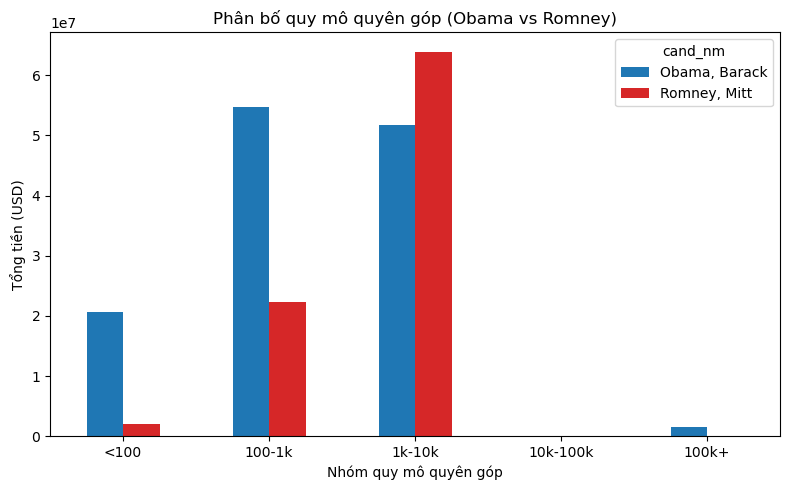

In [ ]:
# Chia quy mô quyên góp thành các nhóm
bins = [0, 100, 1000, 10000, 100000, 1000000]
labels = ['<100', '100-1k', '1k-10k', '10k-100k', '100k+']
fec_mrbo['amount_bin'] = pd.cut(fec_mrbo['contb_receipt_amt'], bins=bins, labels=labels)

# Tổng hợp theo ứng cử viên và nhóm tiền
bucket = fec_mrbo.groupby(['cand_nm', 'amount_bin'])['contb_receipt_amt'].sum().unstack(fill_value=0)

# Vẽ biểu đồ
bucket.T.plot(kind='bar', figsize=(8,5), color=['#1f77b4', '#d62728'])
plt.title("Phân bố quy mô quyên góp (Obama vs Romney)")
plt.ylabel("Tổng tiền (USD)")
plt.xlabel("Nhóm quy mô quyên góp")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
# 4.4. Nghề nghiệp đóng góp nhiều nhất cho mỗi bên
# Tổng hợp tổng quyên góp theo nghề và ứng cử viên
by_occ = fec_mrbo.pivot_table("contb_receipt_amt",
                              index="contbr_occupation",
                              columns="cand_nm",
                              aggfunc="sum")
# Lọc nghề có tổng > 2 triệu USD
top_occ = by_occ[by_occ.sum(axis=1) > 2_000_000]
top_occ.sort_values(by="Obama, Barack", ascending=False).head(10)


cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
RETIRED,"25,305,116","11,508,474"
ATTORNEY,"11,141,983","5,364,719"
INFORMATION REQUESTED,"4,866,974",NaN
HOMEMAKER,"4,248,876","8,147,446"
PHYSICIAN,"3,735,125","1,368,024"
LAWYER,"3,160,479","7,705"
CONSULTANT,"2,459,913","1,424,894"
PROFESSOR,"2,165,071","161,362"
CEO,"2,073,285","355,911"


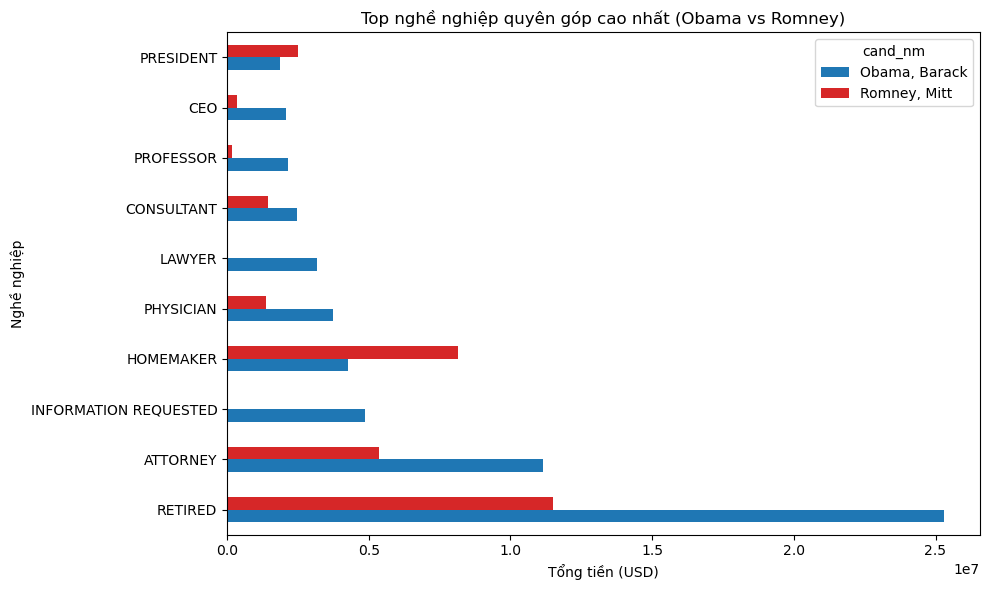

In [58]:
# Tổng hợp theo nghề nghiệp và ứng cử viên
by_occ = fec_mrbo.pivot_table("contb_receipt_amt",
                              index="contbr_occupation",
                              columns="cand_nm",
                              aggfunc="sum")

# Lọc chỉ các nghề có tổng > 2 triệu USD
top_occ = by_occ[by_occ.sum(axis=1) > 2_000_000].sort_values(by="Obama, Barack", ascending=False).head(10)

# Vẽ biểu đồ
top_occ.plot(kind='barh', figsize=(10,6), color=['#1f77b4', '#d62728'])
plt.title("Top nghề nghiệp quyên góp cao nhất (Obama vs Romney)")
plt.xlabel("Tổng tiền (USD)")
plt.ylabel("Nghề nghiệp")
plt.tight_layout()
plt.show()


+ Obama: mạnh ở nhóm nghề nghiệp học thuật (luật sư, giáo sư, bác sĩ).
+ Romney: mạnh ở nhóm kinh tế – doanh nhân (homemaker, executive, CEO).
    + → Nghề nghiệp thể hiện xu hướng chính trị:
        + Giới học thức, học thuật, công nghệ → Dân chủ (Obama).
        + Giới kinh doanh, đầu tư, điều hành → Cộng hòa (Romney).

In [24]:
# 4.5. Các công ty / tổ chức đóng góp nhiều nhất
by_emp = fec_mrbo.pivot_table("contb_receipt_amt",
                              index="contbr_employer",
                              columns="cand_nm",
                              aggfunc="sum")
top_emp = by_emp[by_emp.sum(axis=1) > 1_000_000].sort_values(by="Obama, Barack", ascending=False).head(10)
print(top_emp)


cand_nm                                 Obama, Barack  Romney, Mitt
contbr_employer                                                    
RETIRED                                    22,694,359    11,506,226
SELF-EMPLOYED                              17,080,986     7,409,861
NOT EMPLOYED                                8,586,309         2,500
INFORMATION REQUESTED                       5,053,480           NaN
HOMEMAKER                                   2,605,409     8,147,196
SELF                                        1,076,531         3,400
INFORMATION REQUESTED PER BEST EFFORTS            NaN    12,059,527


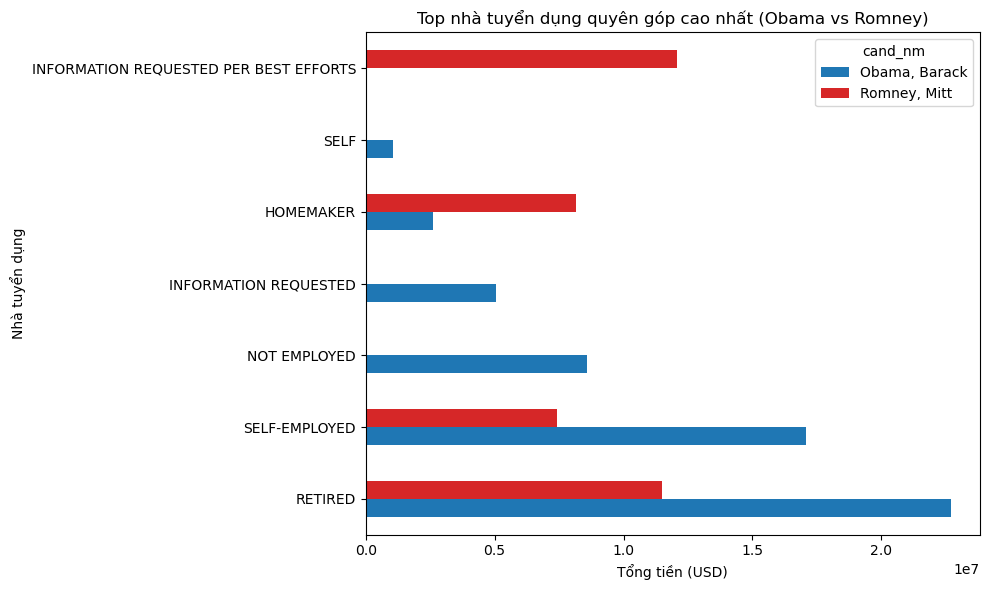

In [59]:
# Tổng hợp theo employer
by_emp = fec_mrbo.pivot_table("contb_receipt_amt",
                              index="contbr_employer",
                              columns="cand_nm",
                              aggfunc="sum")

# Lọc employer có tổng > 1 triệu USD
top_emp = by_emp[by_emp.sum(axis=1) > 1_000_000].sort_values(by="Obama, Barack", ascending=False).head(10)

# Vẽ biểu đồ
top_emp.plot(kind='barh', figsize=(10,6), color=['#1f77b4', '#d62728'])
plt.title("Top nhà tuyển dụng quyên góp cao nhất (Obama vs Romney)")
plt.xlabel("Tổng tiền (USD)")
plt.ylabel("Nhà tuyển dụng")
plt.tight_layout()
plt.show()


**Phân tích so sánh cho thấy:**
+ Obama có ưu thế rõ rệt ở quy mô và sự đa dạng người ủng hộ.
+ Romney có lợi thế ở tầng lớp thu nhập cao, nhà quản lý, nhà đầu tư.
+ Mối quan hệ nghề nghiệp ↔ đảng phái phản ánh phân tầng xã hội Mỹ:
    + Dân chủ: thiên về học thức – cải cách – công nghệ.
    + Cộng hòa: thiên về kinh doanh – bảo thủ – tài chính.

## 5. PHÂN TÍCH KHÔNG GIAN ĐỊA LÝ

In [ ]:
# 5.1. Tổng hợp số tiền quyên góp theo bang (State)
# Ta nhóm dữ liệu theo cand_nm (ứng cử viên) và contbr_st (bang)
state_totals = fec_mrbo.groupby(["cand_nm", "contbr_st"])["contb_receipt_amt"].sum().unstack(fill_value=0)
# Dòng dưới để xem dữ liệu ngang
state_totals.head(10)
# Dòng dưới để xem dữ liệu dọc
display(state_totals.T)


cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,"56,405",135
AB,"2,048",0
AE,"42,974","5,680"
AK,"281,840","86,204"
AL,"543,123","527,304"
...,...,...
WI,"1,130,155","270,316"
WV,"169,154","126,725"
WY,"194,047","252,596"


In [47]:
# 5.2. Lọc 10 bang có tổng quyên góp lớn (để dễ so sánh)

# Tính tổng theo bang
total_by_state = state_totals.sum(axis=0).sort_values(ascending=False)

# Giữ lại top 10 bang có tổng quyên góp cao nhất
top10_states = total_by_state.head(10).index
top10 = state_totals[top10_states]

# Hiển thị cho đẹp
display(top10.T.style.background_gradient(cmap="Greens").format("{:,.0f}"))


cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
CA,"23,824,984","11,237,637"
NY,"14,651,919","10,184,213"
IL,"16,443,896","3,628,572"
FL,"7,318,179","8,338,459"
TX,"6,570,832","6,221,990"
MA,"6,649,015","4,710,542"
VA,"4,259,977","3,465,766"
NJ,"3,203,258","3,333,320"
MD,"4,832,664","1,633,690"


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\993703229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="coolwarm")


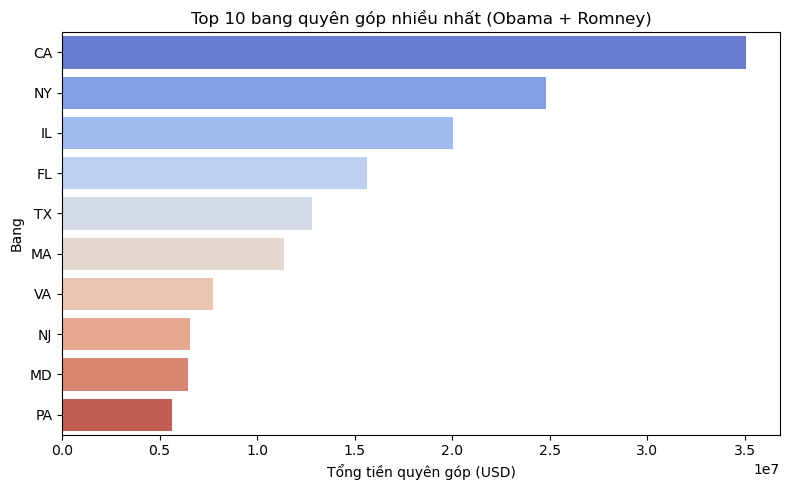

In [60]:
# Tổng quyên góp theo bang (gộp cả hai ứng cử viên)
top_states = fec_mrbo.groupby("contbr_st")["contb_receipt_amt"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_states.values, y=top_states.index, palette="coolwarm")
plt.title("Top 10 bang quyên góp nhiều nhất (Obama + Romney)")
plt.xlabel("Tổng tiền quyên góp (USD)")
plt.ylabel("Bang")
plt.tight_layout()
plt.show()


In [48]:
# 5.3. Tính tỷ lệ phần trăm đóng góp cho mỗi ứng cử viên theo bang (10 bang quyên góp lớn nhất)

# Ép kiểu float để tránh làm tròn
state_totals = state_totals.astype(float)

# Tính tỷ lệ phần trăm quyên góp của mỗi ứng cử viên theo bang
percent = state_totals.div(state_totals.sum(axis=0), axis=1) * 100

# Lọc ra 10 bang có tổng quyên góp cao nhất (theo cả 2 ứng cử viên)
top10_states = state_totals.sum(axis=0).sort_values(ascending=False).head(10).index
percent_top10 = percent[top10_states]

# Hiển thị đẹp
display(percent_top10.T.style.format("{:.1f}%").background_gradient(cmap="Blues"))

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
CA,67.9%,32.1%
NY,59.0%,41.0%
IL,81.9%,18.1%
FL,46.7%,53.3%
TX,51.4%,48.6%
MA,58.5%,41.5%
VA,55.1%,44.9%
NJ,49.0%,51.0%
MD,74.7%,25.3%


C:\Users\PC\AppData\Local\Temp\ipykernel_5320\4197018872.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


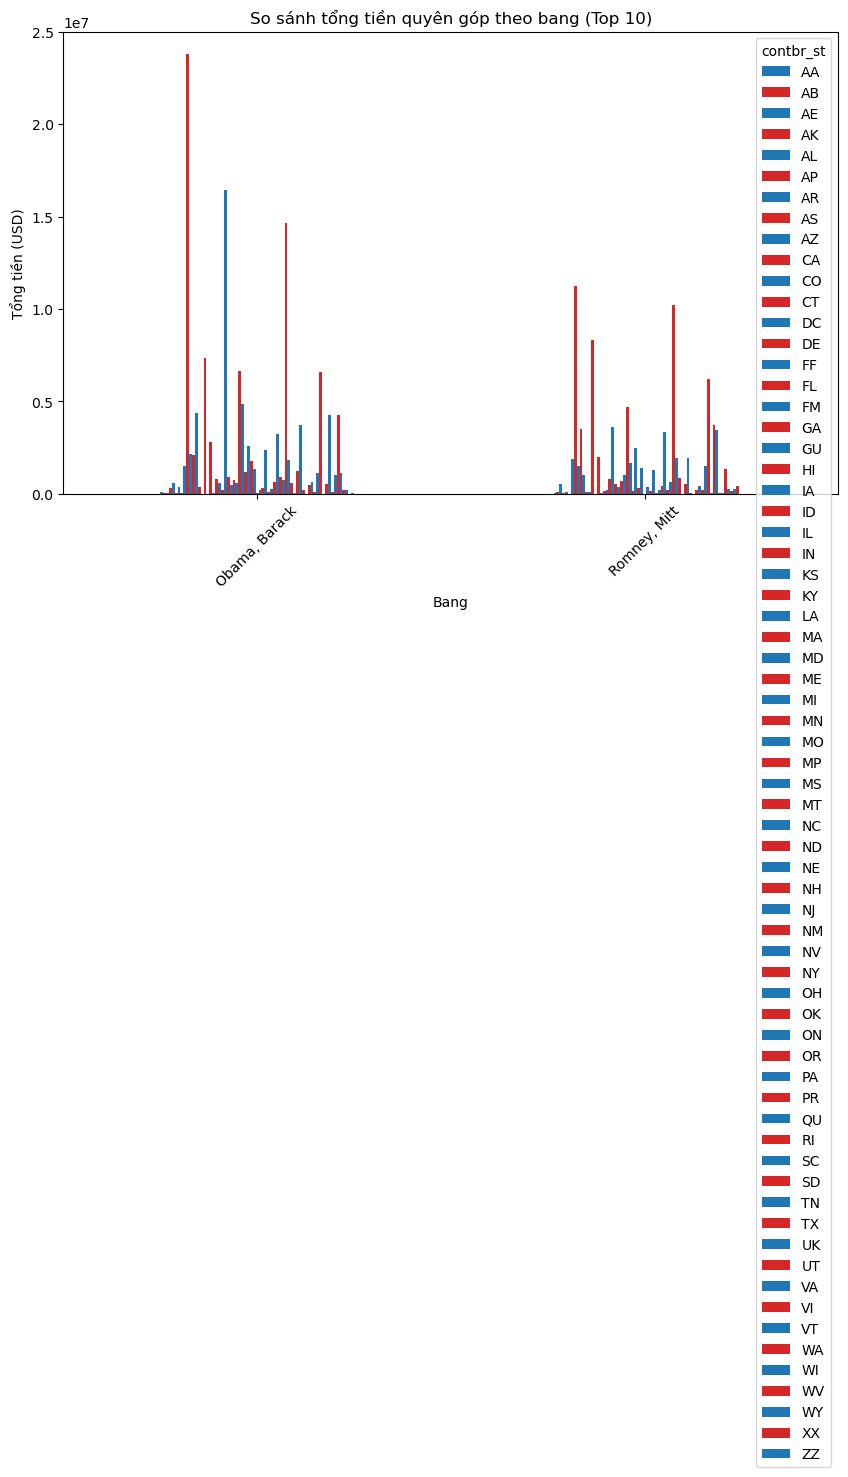

In [61]:
# Gộp tổng tiền quyên góp theo ứng cử viên và bang
state_totals = fec_mrbo.groupby(["cand_nm", "contbr_st"])["contb_receipt_amt"].sum().unstack(fill_value=0)

# Lọc bang có tổng quyên góp > 100k để loại bỏ bang nhỏ
state_totals = state_totals[state_totals.sum(axis=1) > 100_000]

# Lấy top 10 bang quyên góp lớn nhất
top10 = state_totals.sum(axis=1).sort_values(ascending=False).head(10).index
state_totals_top10 = state_totals.loc[top10]

# Vẽ biểu đồ
state_totals_top10.plot(kind='bar', figsize=(10,6), color=['#1f77b4', '#d62728'])
plt.title("So sánh tổng tiền quyên góp theo bang (Top 10)")
plt.ylabel("Tổng tiền (USD)")
plt.xlabel("Bang")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# 5.4. Phân tích theo khu vực (Bờ Đông vs Bờ Tây)
west = ["CA", "OR", "WA", "NV", "HI"]
east = ["NY", "NJ", "MA", "FL", "DC", "MD", "VA"]

west_sum = fec_mrbo[fec_mrbo["contbr_st"].isin(west)].groupby("cand_nm")["contb_receipt_amt"].sum()
east_sum = fec_mrbo[fec_mrbo["contbr_st"].isin(east)].groupby("cand_nm")["contb_receipt_amt"].sum()
print("Bờ Tây:\n", west_sum, "\n\nBờ Đông:\n", east_sum)


Bờ Tây:
 cand_nm
Obama, Barack   30,804,766
Romney, Mitt    13,847,208
Name: contb_receipt_amt, dtype: float64 

Bờ Đông:
 cand_nm
Obama, Barack   45,288,550
Romney, Mitt    32,691,128
Name: contb_receipt_amt, dtype: float64


+ Obama mạnh ở Đông Bắc và Trung Tây (MD, MA, IL, PA, NY).
+ Romney mạnh hơn ở Nam và Tây Nam (TX, FL, VA).
+ California (West) là bang cực lớn, nghiêng về Obama.